In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("../data/processed/diabetes_cleaned.csv")

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check Class Balance

In [28]:
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='str')

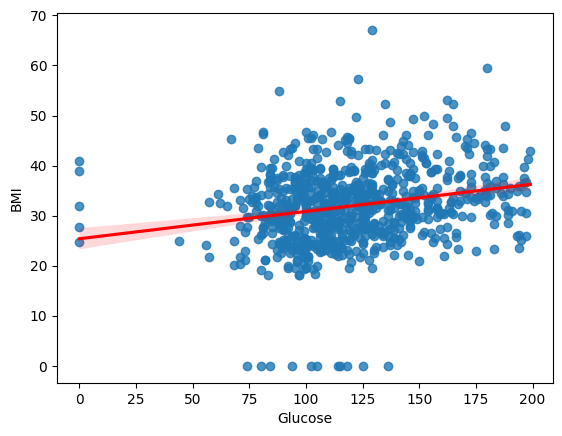

In [30]:
# check the relationship between Glucose and BMI 
sns.regplot(data = df, x="Glucose",y="BMI",line_kws={"color":"red"})
plt.show()

In [31]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


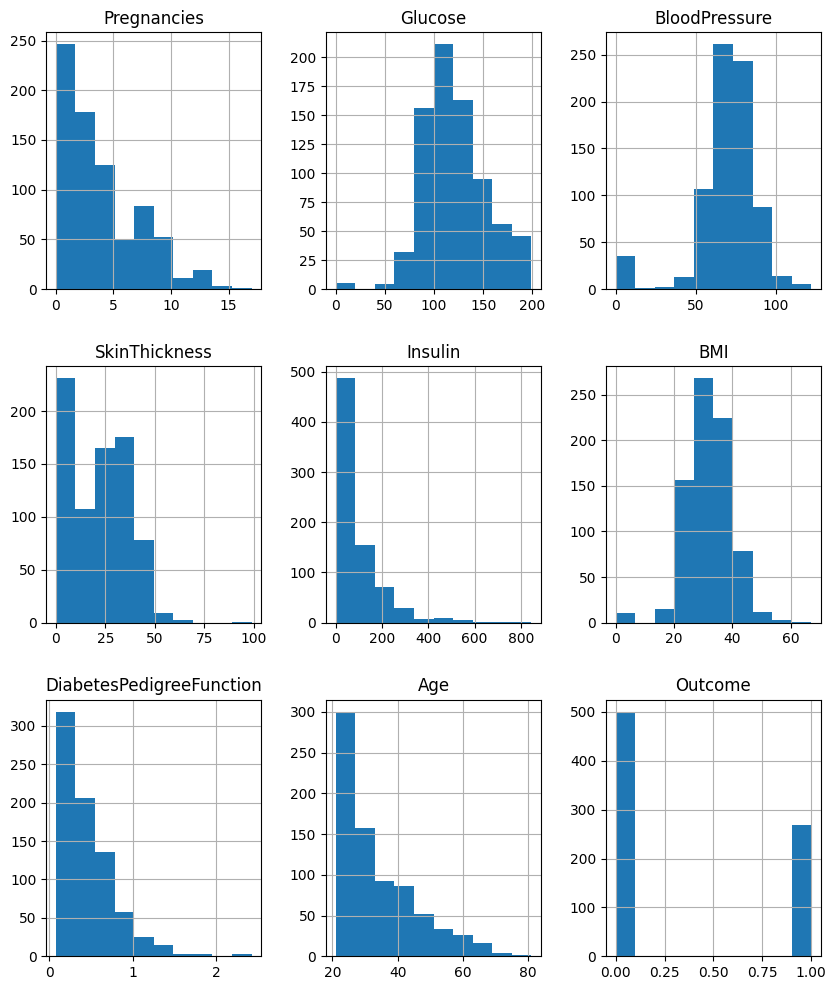

In [32]:
# Distribution of Feature
df.hist(figsize=(10,12))
plt.show()

these are histogram:
1. Pregnancies:
-> Right-Skewed distribution
-> Most Value 0-5
-> Few extreme value (10-15) 
Meaning: 
-> Most Woman have low pregnancy count
-> Some outliear exits
-> Not normally distributted

For Glucose: 
-> Almost normal distribution
-> Centered around (100-130)
-> Few very low values (possibly 0 -> invalid)
Insight:
Glucose is usually the strongest predictor of diabetes.

For Blood Pressure:
-> Slightly normal distribution
-> Center around (50-80)
Insight:
Blood presure = 0 is medically impossible -> must replace

For SkinThickness:
Strong right skew
Many low values
Likely many zeros
Insight:

This column usually has many missing values disguised as zero.

Insulin

Very heavily right-skewed
Many small values
Extreme outliers (300–800)

⚠ This feature has strong outliers.

Professional action:

Consider log transformation

Or leave as is (SVM handles scaling but not extreme outliers well)

For BMI:
Slightly normal
Centered around 30–35
Few zeros (invalid)

BMI cannot be 0 → must replace.

For DiabetesPedigreeFunction:

Highly right-skewed
Most values below 1
Few extreme outliers

This is genetic risk score.

For Age:

Right-skewed
Most between 20–40
Few older patients

This means dataset is mostly younger population

For Outcome:

Binary distribution
0 > 1
Slight class imbalance (65% vs 35%)

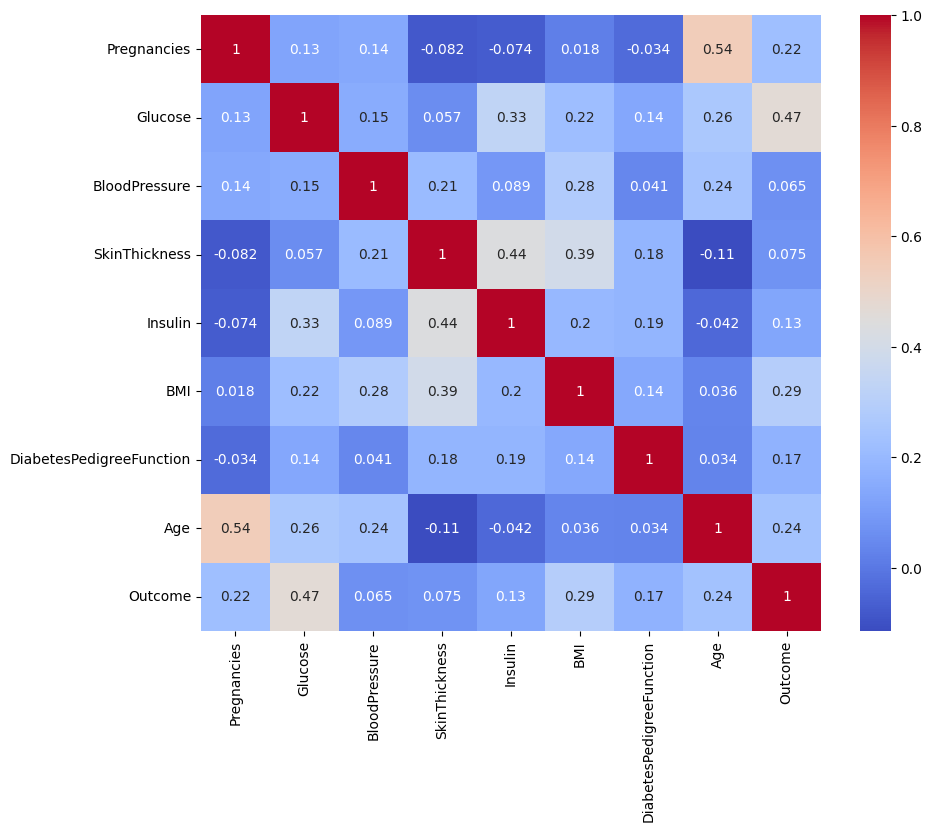

In [33]:
# Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

Correlation with outcome:
| Feature                  | Correlation with Outcome |
| ------------------------ | ------------------------ |
|   Glucose                | 0.47                     |
| BMI                      | 0.29                     |
| Age                      | 0.24                     |
| Pregnancies              | 0.22                     |
| DiabetesPedigreeFunction | 0.17                     |
| Insulin                  | 0.13                     |
| SkinThickness            | 0.075                    |
| BloodPressure            | 0.065                    |


Glucose (0.47)

Strongest relationship.

This is expected medically.

Higher glucose → higher diabetes probability.

BMI (0.29)

Moderate positive relation.

Higher BMI → higher diabetes risk.

Age (0.24)

Older age → slightly more diabetes risk.

BloodPressure & SkinThickness

Very weak correlation.

May not contribute much alone.

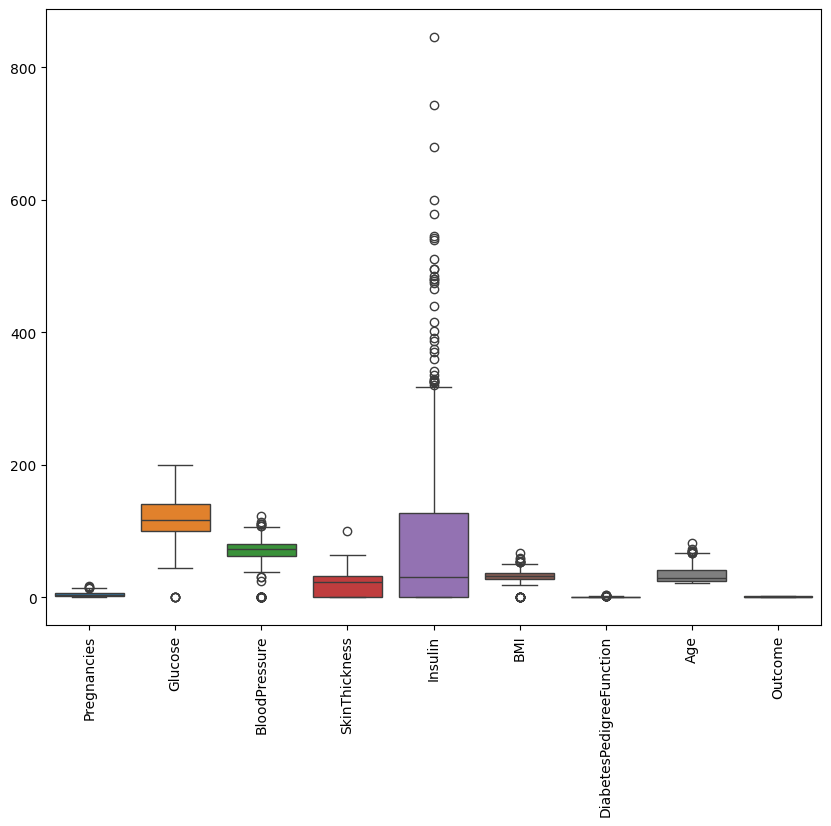

In [34]:
# Boxplot for Outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Insulin (Major Issue)

Very strong right skew
Many extreme outliers (300–800)
Large variance

This is the biggest outlier problem in dataset.

In [35]:
# og Transformation
# Because Insulin is right-skewed.

import numpy as np
df['Insulin'] = np.log1p(df['Insulin'])


Compresses large values

Reduces skewness

Keeps order of data

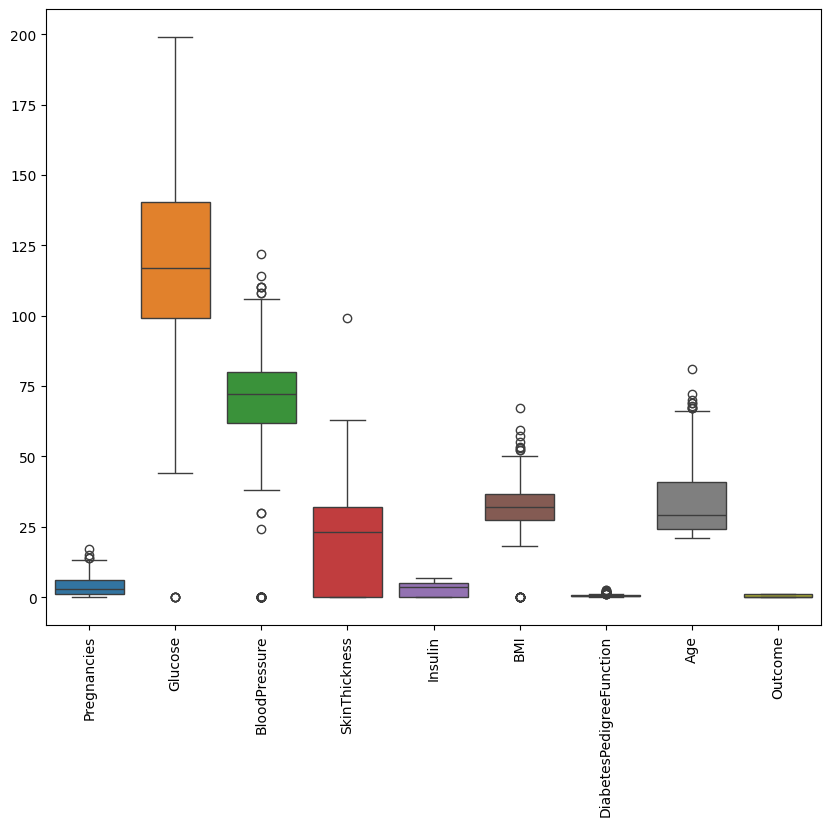

In [36]:
# Boxplot for Outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

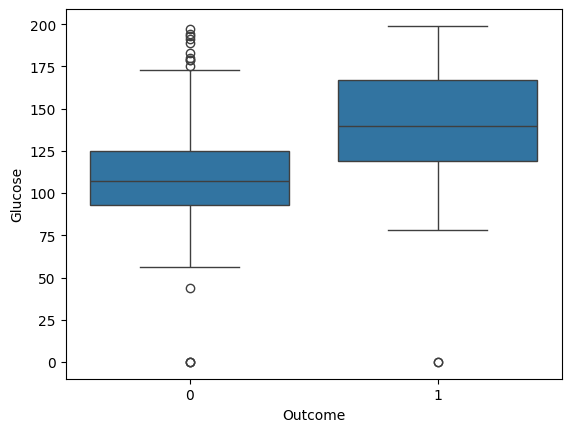

In [18]:
# Feature vs Target Relationship
sns.boxplot(x="Outcome",y="Glucose",data=df)
plt.show()

In [19]:
df.corr()["Outcome"].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [37]:
df.to_csv("../data/processed/after_EDA.csv")